In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras import backend
import random
import csv
import cv2
from tqdm import tqdm, notebook
from time import sleep
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
# function for reading the images
# arguments: path to the traffic sign data, for example './GTSRB/Training'
# returns: list of images, list of corresponding labels 
def readTrafficSigns(rootpath, dim):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    image = np.array([]) #helper to resize images to dim
    images = [] # images
    labels = [] # corresponding labels
    # loop over all classes
    for c in notebook.tqdm(range(0,43), desc="read classes"):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        gtReader.__next__() # skip header
        sleep(0.001)
        for row in gtReader:
            image = plt.imread(prefix + row[0])
            image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
            images.append(image)
            labels.append(row[7]) # the 8th column is the label
        gtFile.close()
    img = np.asarray(images)
    lab = np.asarray(labels, dtype=np.uint8)
    return img, lab

In [3]:
# function for reading the images
# arguments: path to the traffic sign data, for example './GTSRB/Training'
# returns: list of images, list of corresponding labels 
def readTrafficSigns_test(rootpath, dim):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    image = np.array([]) #helper to resize images to dim
    images = [] # images
    labels = [] # corresponding labels
    # loop over all classes
    prefix = rootpath + '/'
    gtFile = open(prefix + 'GT-final_test.csv') # annotations file
    gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
    gtReader.__next__() # skip header
    sleep(0.001)
    for row in notebook.tqdm(gtReader, desc="images"):
        image = plt.imread(prefix + row[0])
        image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
        images.append(image)
        labels.append(row[7]) # the 8th column is the label
        sleep(0.001)
    gtFile.close()
    img = np.asarray(images)
    lab = np.asarray(labels, dtype=np.uint8)
    return img, lab

In [4]:
path_train = "C:/Users/Thomas/Desktop/GTSRB/Final_Training/Images"
path_test = "C:/Users/Thomas/Desktop/GTSRB/Final_Test/Images"

In [5]:
# size in which the images should be resized
dim = (32,32)
X_train_all, y_train_all = readTrafficSigns(path_train, dim)

In [6]:
X_test, y_test = readTrafficSigns_test(path_test, dim)

In [7]:
# read signames from csv
data = pd.read_csv("C:/Users/Thomas/Desktop/tsp/input/labels/signnames.csv", sep=";", encoding="mac_latin2")
data

,ClassId,SignName,SignNameGerman
0,0,Speed limit (20km/h),Max. 20km/h
1,1,Speed limit (30km/h),Max. 30km/h
2,2,Speed limit (50km/h),Max. 50km/h
3,3,Speed limit (60km/h),Max. 60km/h
4,4,Speed limit (70km/h),Max. 70km/h
5,5,Speed limit (80km/h),Max. 80km/h
6,6,End of speed limit (80km/h),Ende Max. 80km/h
7,7,Speed limit (100km/h),Max. 100km/h
8,8,Speed limit (120km/h),Max. 120km/h
9,9,No passing,Ueberholverbot


In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, test_size=0.1, random_state=1) # 0.125 x 0.8 = 0.1

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(35288, 32, 32, 3)
(35288,)
(3921, 32, 32, 3)
(3921,)


In [10]:
dim_rgb = dim + (3,)
dim_rgb

(32, 32, 3)

In [11]:
def convert_grayscale(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

def equalize_histogram(image):
    image = cv2.equalizeHist(image)
    return image

def preprocessing_images(image):
    image = convert_grayscale(image)
    image = equalize_histogram(image)
    # normalisierung
    image = image/255
    return image

In [12]:
X_train_pcd = np.array(list(map(preprocessing_images, X_train)))
X_val_pcd = np.array(list(map(preprocessing_images, X_val)))
X_test_pcd = np.array(list(map(preprocessing_images, X_test)))

In [13]:
# adding depth for cnn
X_train_pcd = X_train_pcd.reshape(X_train_pcd.shape[0],X_train_pcd.shape[1],X_train_pcd.shape[2],1)
X_val_pcd = X_val_pcd.reshape(X_val_pcd.shape[0],X_val_pcd.shape[1],X_val_pcd.shape[2],1)
X_test_pcd = X_test_pcd.reshape(X_test_pcd.shape[0],X_test_pcd.shape[1],X_test_pcd.shape[2],1)

In [14]:
from keras.preprocessing.image import ImageDataGenerator
#in percent
datagen = ImageDataGenerator(width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    zoom_range=0.2,
                                    shear_range=0.1,
                                    rotation_range=10)

datagen.fit(X_train_pcd)

In [15]:
number_classes = 43

# one hot encode the values
y_train_pcd = to_categorical(y_train, number_classes)
y_val_pcd = to_categorical(y_val, number_classes)
y_test_pcd = to_categorical(y_test, number_classes)

In [17]:
def leNet():
    model = Sequential()
    model.add(Conv2D(30, (5,5), input_shape=(32,32,1), activation="relu"))
    # pooling layer - reduces the shape from 24x24 (from convolutional) to here 12x12 (cause of 2x2 pool size))
    # argument
    #   1. pool size (tupel)
    model.add(MaxPooling2D(pool_size=(2,2)))
    # adding 2. conv layer
    model.add(Conv2D(15, (3,3), activation="relu"))
    # 2. pooling layer
    model.add(MaxPooling2D(pool_size=(2,2)))
    # flattens the data
    model.add(Flatten())
    # creating the neural network
    # input nodes - play with it
    model.add(Dense(500, activation="relu"))
    # dropout layer (more than one possible) - randomly turns nodes off during training to get a more generalized cnn
    # 0.5 = 50%, propsed rate by researchers
    model.add(Dropout(0.5))
    # output layer
    model.add(Dense(number_classes, activation="softmax"))
    # compile model
    model.compile(Adam(lr=0.01), loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [18]:
def leNet_moreFilter():
    model = Sequential()
    model.add(Conv2D(60, (5,5), input_shape=(32,32,1), activation="relu"))
    # pooling layer - reduces the shape from 24x24 (from convolutional) to here 12x12 (cause of 2x2 pool size))
    # argument
    #   1. pool size (tupel)
    model.add(MaxPooling2D(pool_size=(2,2)))
    # adding 2. conv layer
    model.add(Conv2D(30, (3,3), activation="relu"))
    # 2. pooling layer
    model.add(MaxPooling2D(pool_size=(2,2)))
    # flattens the data
    model.add(Flatten())
    # creating the neural network
    # input nodes - play with it
    model.add(Dense(500, activation="relu"))
    # dropout layer (more than one possible) - randomly turns nodes off during training to get a more generalized cnn
    # 0.5 = 50%, propsed rate by researchers
    model.add(Dropout(0.5))
    # output layer
    model.add(Dense(number_classes, activation="softmax"))
    # compile model
    model.compile(Adam(lr=0.01), loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [19]:
def leNet_moreFilter_lowerLr():
    model = Sequential()
    model.add(Conv2D(60, (5,5), input_shape=(32,32,1), activation="relu"))
    # pooling layer - reduces the shape from 24x24 (from convolutional) to here 12x12 (cause of 2x2 pool size))
    # argument
    #   1. pool size (tupel)
    model.add(MaxPooling2D(pool_size=(2,2)))
    # adding 2. conv layer
    model.add(Conv2D(30, (3,3), activation="relu"))
    # 2. pooling layer
    model.add(MaxPooling2D(pool_size=(2,2)))
    # flattens the data
    model.add(Flatten())
    # creating the neural network
    # input nodes - play with it
    model.add(Dense(500, activation="relu"))
    # dropout layer (more than one possible) - randomly turns nodes off during training to get a more generalized cnn
    # 0.5 = 50%, propsed rate by researchers
    model.add(Dropout(0.5))
    # output layer
    model.add(Dense(number_classes, activation="softmax"))
    # compile model
    model.compile(Adam(lr=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [20]:
def leNet_moreFilter_lowerLr_higherDense():
    model = Sequential()
    model.add(Conv2D(60, (5,5), input_shape=(32,32,1), activation="relu"))
    # pooling layer - reduces the shape from 24x24 (from convolutional) to here 12x12 (cause of 2x2 pool size))
    # argument
    #   1. pool size (tupel)
    model.add(MaxPooling2D(pool_size=(2,2)))
    # adding 2. conv layer
    model.add(Conv2D(30, (3,3), activation="relu"))
    # 2. pooling layer
    model.add(MaxPooling2D(pool_size=(2,2)))
    # flattens the data
    model.add(Flatten())
    # creating the neural network
    # input nodes - play with it
    model.add(Dense(2000, activation="relu"))
    # dropout layer (more than one possible) - randomly turns nodes off during training to get a more generalized cnn
    # 0.5 = 50%, propsed rate by researchers
    model.add(Dropout(0.5))
    # output layer
    model.add(Dense(number_classes, activation="softmax"))
    # compile model
    model.compile(Adam(lr=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [16]:
def leNet_moreFilter_lowerLr_higherDense_addLayer():
    model = Sequential()
    model.add(Conv2D(60, (5,5), input_shape=(32,32,1), activation="relu"))
    # pooling layer - reduces the shape from 24x24 (from convolutional) to here 12x12 (cause of 2x2 pool size))
    # argument
    #   1. pool size (tupel)
    model.add(MaxPooling2D(pool_size=(2,2)))
    # adding 2. conv layer
    model.add(Conv2D(30, (3,3), activation="relu"))
    model.add(Conv2D(30, (3,3), activation="relu"))
    # 2. pooling layer
    model.add(MaxPooling2D(pool_size=(2,2)))
    # flattens the data
    model.add(Flatten())
    # creating the neural network
    # input nodes - play with it
    model.add(Dense(1000, activation="relu"))
    # dropout layer (more than one possible) - randomly turns nodes off during training to get a more generalized cnn
    # 0.5 = 50%, propsed rate by researchers
    model.add(Dropout(0.5))
    # output layer
    model.add(Dense(number_classes, activation="softmax"))
    # compile model
    model.compile(Adam(lr=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [22]:
def leNet_moreFilter_lowerLr_higherDense_addLayer_addDropout():
    model = Sequential()
    model.add(Conv2D(60, (5,5), input_shape=(32,32,1), activation="relu"))
    # pooling layer - reduces the shape from 24x24 (from convolutional) to here 12x12 (cause of 2x2 pool size))
    # argument
    #   1. pool size (tupel)
    model.add(MaxPooling2D(pool_size=(2,2)))
    # adding 2. conv layer
    model.add(Conv2D(30, (3,3), activation="relu"))
    model.add(Conv2D(30, (3,3), activation="relu"))
    # 2. pooling layer
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    # flattens the data
    model.add(Flatten())
    # creating the neural network
    # input nodes - play with it
    model.add(Dense(500, activation="relu"))
    # dropout layer (more than one possible) - randomly turns nodes off during training to get a more generalized cnn
    # 0.5 = 50%, propsed rate by researchers
    model.add(Dropout(0.5))
    # output layer
    model.add(Dense(number_classes, activation="softmax"))
    # compile model
    model.compile(Adam(lr=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [49]:
#actual prefered
def leNet_lowerLr_higherDense_addLayer_addDropout():
    model = Sequential()
    model.add(Conv2D(60, (5,5), input_shape=(32,32,1), activation="relu"))
    model.add(Conv2D(60, (5,5), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # adding 2. conv layer
    model.add(Conv2D(30, (3,3), activation="relu"))
    model.add(Conv2D(30, (3,3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Dropout(0.5))
    
    #NN
    model.add(Flatten())
    model.add(Dense(500, activation="relu"))
    model.add(Dropout(0.5))
    
    # output layer
    model.add(Dense(number_classes, activation="softmax"))
    
    # compile model
    model.compile(Adam(lr=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [50]:
def leNet_lowerLr_higherDense_addLayer_addDropout2():
    model = Sequential()
    model.add(Conv2D(60, (5,5), input_shape=(32,32,1), activation="relu"))
    model.add(Conv2D(60, (5,5), activation="relu"))
    # pooling layer - reduces the shape from 24x24 (from convolutional) to here 12x12 (cause of 2x2 pool size))
    # argument
    #   1. pool size (tupel)
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    # adding 2. conv layer
    model.add(Conv2D(30, (3,3), activation="relu"))
    model.add(Conv2D(30, (3,3), activation="relu"))
    # 2. pooling layer
    model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Dropout(0.5))
    # flattens the data
    model.add(Flatten())
    # creating the neural network
    # input nodes - play with it
    model.add(Dense(500, activation="relu"))
    # dropout layer (more than one possible) - randomly turns nodes off during training to get a more generalized cnn
    # 0.5 = 50%, propsed rate by researchers
    model.add(Dropout(0.5))
    # output layer
    model.add(Dense(number_classes, activation="softmax"))
    # compile model
    model.compile(Adam(lr=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# repeat here!!!

In [18]:
backend.clear_session()
#del model

epochs_cnn = 15
batch_size_fitgen = 32

model = leNet_moreFilter_lowerLr_higherDense_addLayer()
#history = model.fit(X_train_pcd, y_train_pcd, epochs=epochs_cnn, validation_data=(X_val_pcd, y_val_pcd), batch_size=200, verbose=1, shuffle=1)
history = model.fit(datagen.flow(X_train_pcd, y_train_pcd, batch_size=batch_size_fitgen), steps_per_epoch=len(X_train_pcd)/batch_size_fitgen, epochs=epochs_cnn, validation_data=(X_val_pcd, y_val_pcd), verbose=1, shuffle = 1)

Epoch 1/15
1103/1102 [==============================] - 11s 10ms/step - loss: 1.4292 - accuracy: 0.5866 - val_loss: 0.2483 - val_accuracy: 0.9283
Epoch 2/15
1103/1102 [==============================] - 10s 9ms/step - loss: 0.4739 - accuracy: 0.8534 - val_loss: 0.0874 - val_accuracy: 0.9709
Epoch 3/15
1103/1102 [==============================] - 10s 9ms/step - loss: 0.3035 - accuracy: 0.9051 - val_loss: 0.0768 - val_accuracy: 0.9776
Epoch 4/15
1103/1102 [==============================] - 10s 9ms/step - loss: 0.2256 - accuracy: 0.9291 - val_loss: 0.1510 - val_accuracy: 0.9475
Epoch 5/15
1103/1102 [==============================] - 10s 9ms/step - loss: 0.1958 - accuracy: 0.9370 - val_loss: 0.0357 - val_accuracy: 0.9875- loss: 0.1959 - accuracy
Epoch 6/15
1103/1102 [==============================] - 10s 9ms/step - loss: 0.1682 - accuracy: 0.9472 - val_loss: 0.0234 - val_accuracy: 0.9929
Epoch 7/15
1103/1102 [==============================] - 10s 9ms/step - loss: 0.1529 - accuracy: 0.9505 -

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 60)        1560      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 60)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 30)        16230     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 30)        8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 30)          0         
_________________________________________________________________
flatten (Flatten)            (None, 750)               0         
_________________________________________________________________
dense (Dense)                (None, 1000)              7

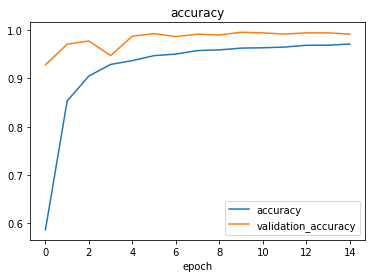

In [19]:
print(model.summary())
print()
print()

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("accuracy")
plt.xlabel("epoch")
plt.legend(["accuracy", "validation_accuracy"])
print("number of epochs", epochs_cnn)
print()
print("Train Accuracy", round(history.history["accuracy"][epochs_cnn-1],3))
print("Val Accuracy", round(history.history["val_accuracy"][epochs_cnn-1],3))


score = model.evaluate(X_test_pcd, y_test_pcd, verbose = 0)
print("Test Score    ", round(score[0],3)) #evaluation of the loss function for a given input
print("Test Accuracy ", round(score[1],3))

In [20]:
model.save("fit_gen_v2")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: fit_gen_v2\assets


In [ ]:
#reconstructed_model = keras.models.load_model("model_lr_dr_addL_Dense500_Epochs100_v2")

In [ ]:
#score = model.evaluate(X_test_pcd, y_test_pcd, verbose = 0)
#print("Test Score    ", round(score[0],3)) #evaluation of the loss function for a given input
#print("Test Accuracy ", round(score[1],3))